In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import plot, show, grid, xlabel, ylabel

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'
btc_usd = pd.read_csv("BTC-USD.csv")
housing = pd.read_excel("housing.xlsx")

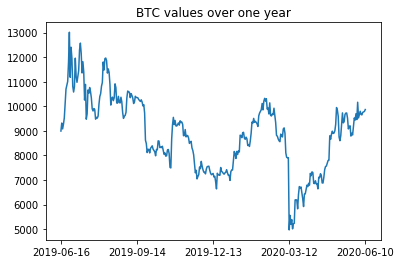

In [3]:
#btc_usd['Close'].plot()
plt.plot(btc_usd['Date'], btc_usd['Close'])
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(90))
plt.title('BTC values over one year')
plt.savefig('year_btc.png', transparent=True)
show()

In [8]:
#housing.loc[housing['TIME']=='2019-Q1']
housing.loc[housing['TIME']=='2011-Q1']

,TIME,GER
24,2011-Q1,86.0


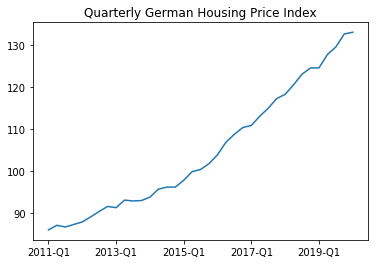

In [9]:
#plt.plot(housing['TIME'][56:], housing['GER'][56:])
plt.plot(housing['TIME'][24:], housing['GER'][24:])
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(8))
plt.title('Quarterly German Housing Price Index')
plt.savefig('housing.png', transparent=True)
show()

In [6]:
btc_usd.loc[btc_usd['Date']=='2020-03-01']

,Date,Open,High,Low,Close,Adj Close,Volume
259,2020-03-01,8599.758789,8726.796875,8471.212891,8562.454102,8562.454102,35349164300


In [7]:
# create subset, here for month of march
subset = btc_usd[259:290]
subset.index = range(0,len(subset))
subset.index.name = 'Days'
subset['LTV']=''

In [8]:
# borrowed amount in USD
B0 = 10000

# pre-agreed initial LTV
ltv0 = 0.6
# pre-agreed liquidation threshold
K = 0.9

# danger zone
D = 0.8

# BTC needed
CS_btc = B0/(ltv0*subset['Close'][0])

# in USD
CS_usd = CS_btc*subset['Close'][0]

print('Amount of Bitcoin:', CS_btc)
print('Value in USD:', CS_usd)

Amount of Bitcoin: 1.946482453292649
Value in USD: 16666.666666666664


In [9]:
# calculate LTV ratios
subset['LTV'][0] = ltv0
for i in range(1,len(subset)):
    subset['LTV'][i] = B0/(CS_btc*subset['Close'][i])

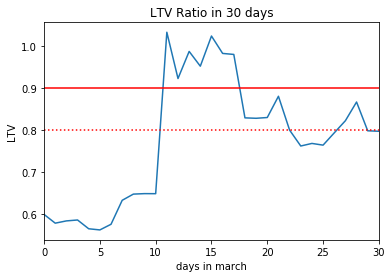

In [11]:
subset['LTV'].plot()
xlabel('days in march')
ylabel('LTV')
plt.title('LTV Ratio in 30 days')
plt.axhline(y=K, color='r', linestyle='-')
plt.axhline(y=D, color='r', linestyle='dotted')
plt.savefig('case_study.png', transparent=True)
show()

In [13]:
print('Danger Zone is reached after', np.argwhere(subset['LTV']>=D)[0], 'days.')
print('Collateral is sold after', np.argwhere(subset['LTV']>=K)[0], 'days.')

Danger Zone is reached after [11] days.
Collateral is sold after [11] days.


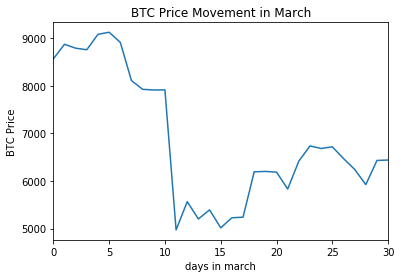

In [14]:
subset['Close'].plot()
xlabel('days in march')
ylabel('BTC Price')
plt.title('BTC Price Movement in March')
plt.savefig('march_btc.png', transparent=True)
show()